<a href="https://colab.research.google.com/github/adancalderon/MLintro/blob/main/COMP4980ML_W22_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

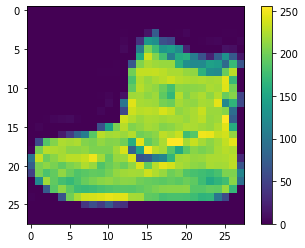

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
y_train[0]

9

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

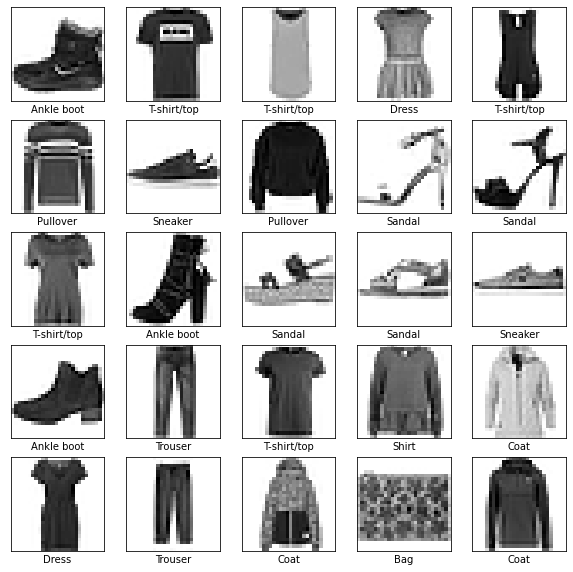

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Convolutional layer code from: https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(8, (3, 3), padding="same", activation="relu", input_shape=(28, 28,1)),
                             tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(16, activation='sigmoid'),
                             tf.keras.layers.Dense(10)
])

In [ ]:
P_train = X_train.flatten().reshape(X_train.shape[0], X_train.shape[1]**2)

In [ ]:
P_test = X_test.flatten().reshape(X_test.shape[0], X_train.shape[1]**2)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10))
clf.fit(P_train, y_train)
y_pred = clf.predict(P_test)
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


NameError: ignored

In [ ]:
model.compile( optimizer = 'adam',
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
               metrics = ['accuracy'] )

In [ ]:
model.fit( X_train, y_train, epochs=10 )

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.7274 - accuracy: 0.7820
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4000 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.3376 - accuracy: 0.8824
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3061 - accuracy: 0.8929
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2848 - accuracy: 0.8988
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2655 - accuracy: 0.9051
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2547 - accuracy: 0.9085
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2393 - accuracy: 0.9134
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2312 - accuracy: 0.9158
Epoch 10/10
1875/1875 [==============================] - 24s 13m

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 2s - loss: 0.2700 - accuracy: 0.9059 - 2s/epoch - 6ms/step
Test accuracy: 0.9059000015258789


In [ ]:
model.predict(X_test)[0]

array([-5.4362845, -4.959927 , -5.522984 , -3.3801801, -8.168761 ,
       -2.3825333, -5.2909465, -0.6236759, -5.656445 ,  6.823464 ],
      dtype=float32)

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
y_pred = probability_model.predict(X_test)

In [ ]:
y_pred[0]

array([8.0850086e-08, 1.4099993e-09, 9.0250886e-08, 6.1388716e-10,
       3.0885003e-06, 1.1497436e-03, 4.7507519e-06, 3.4096740e-02,
       1.2972063e-06, 9.6474421e-01], dtype=float32)

In [ ]:
predictions = np.zeros(y_pred.shape[0])

for i in range(y_pred.shape[0]):
  predictions[i] = np.argmax(y_pred[i])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions, y_test))

0.9059


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

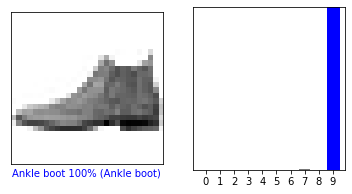

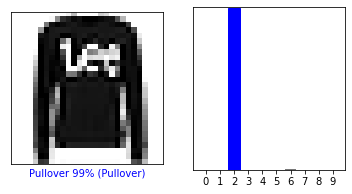

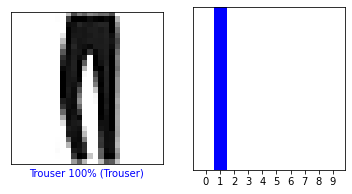

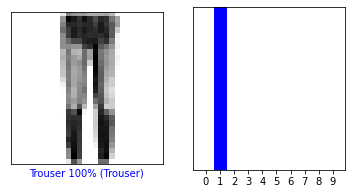

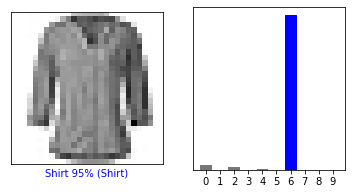

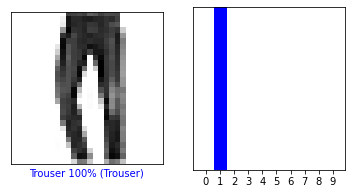

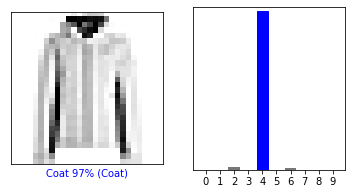

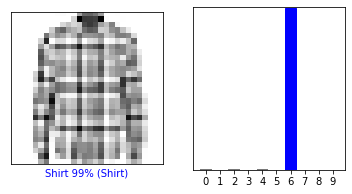

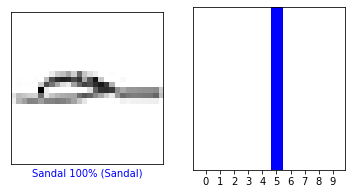

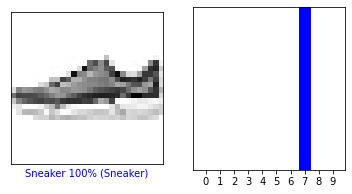

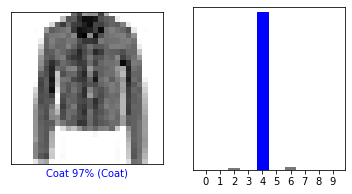

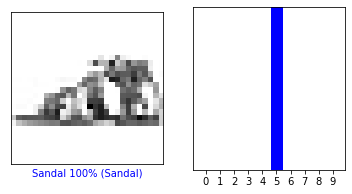

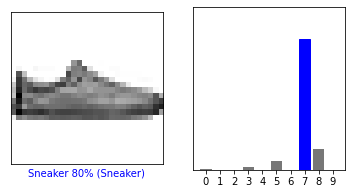

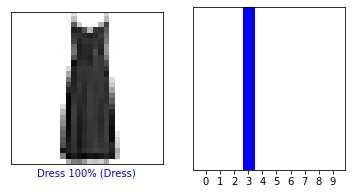

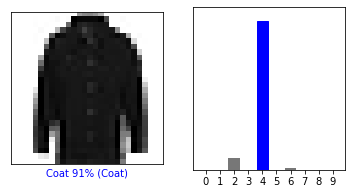

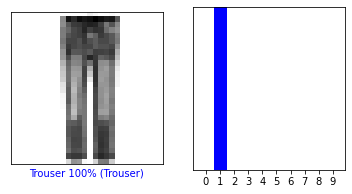

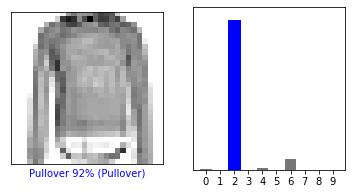

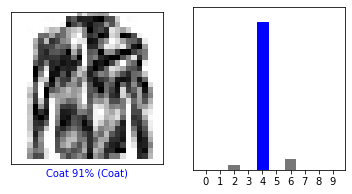

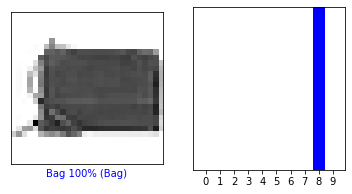

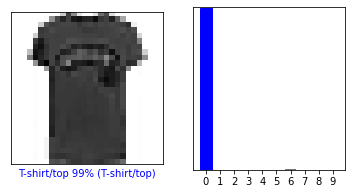

In [ ]:
for i in range(20):
 plt.figure(figsize=(6,3))
 plt.subplot(1,2,1)
 plot_image(i, y_pred[i], y_test, X_test)
 plt.subplot(1,2,2)
 plot_value_array(i, y_pred[i], y_test)
 plt.show()

In [ ]:
w = model.get_weights()

for i in range(2,len(w)):
  print(len(w[i][0]))

64


TypeError: ignored